In [3]:
%pip install opencv-python-headless
%pip install numpy pillow matplotlib

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
    --------------------------------------- 0.8/38.9 MB 3.6 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.9 MB 4.1 MB/s eta 0:00:10
   --- ------------------------------------ 3.1/38.9 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.5/38.9 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.9 MB 5.4 MB/s eta 0:00:07
   ------- -------------------------------- 7.3/38.9 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/38.9 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.9 MB 5.5 MB/s eta 0:00:06
   ---------- ----------------------------- 10.5/38.9 MB 5.4 MB/s eta 0:00:06
   ------------ --------------------------- 11.8/38.9 MB 5.5 MB/s eta 0:00:05
   ------------ --------------------------- 12.6/38.9 MB 5.3 MB/s eta 0:00:05
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


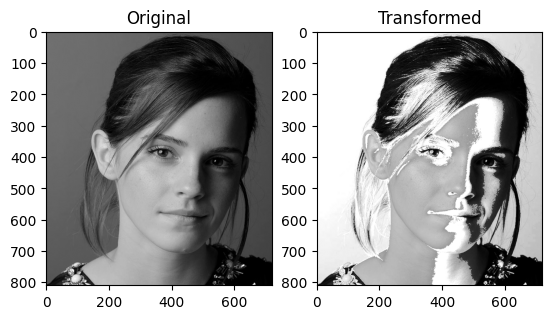

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\emma.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")


# Create lookup table (LUT) for intensity mapping
LUT = np.zeros(256, dtype=np.uint8)

for input_intensity in range(256):
    if input_intensity < 50:
        out_intensity = input_intensity
    elif input_intensity == 50:
        out_intensity = np.random.randint(50, 100)  # Random value between 100 and 150
    elif input_intensity > 50 and input_intensity <150 :
        out_intensity = (255 - 150) / (150 - 100) * (input_intensity ) + 50  # slope 2.1 approx
    elif input_intensity == 150:    
        out_intensity = np.random.randint(155, 255)
    else:
        out_intensity = input_intensity
    
    LUT[input_intensity] = np.clip(out_intensity, 0, 255)

# Apply transformation using LUT
transformed = cv2.LUT(img, LUT)

# Display results
plt.subplot(1,2,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(transformed, cmap="gray"), plt.title("Transformed")
plt.show()


Q2

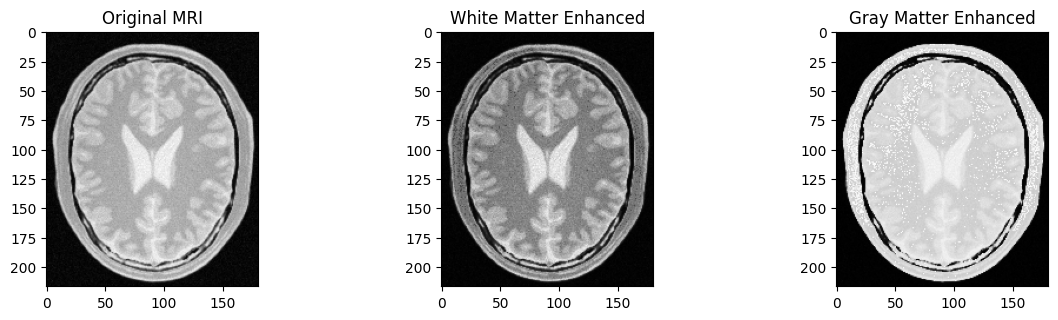

In [ ]:
# Load MRI image (grayscale)
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# ----- White matter enhancement -----
LUT_white = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 150:
        s = int(r * 0.5)   # compress dark range
    else:
        s = int((r - 150) * (255-100)/(255-150) + 100)  # stretch bright range
    LUT_white[r] = np.clip(s, 0, 255)

white_enhanced = cv2.LUT(img, LUT_white)

# ----- Gray matter enhancement -----
LUT_gray = np.zeros(256, dtype=np.uint8)
for r in range(256):
    if r < 80:
        s = int(r * 0.3)   # compress low intensities
    elif r < 160:
        s = int((r - 80) * (255-50)/(160-80) + 50)  # stretch mid range
    else:
        s = int((r - 160) * 0.5 + 200)  # compress high intensities
    LUT_gray[r] = np.clip(s, 0, 255)

gray_enhanced = cv2.LUT(img, LUT_gray)

# ----- Plot results -----
plt.figure(figsize=(12,6))

plt.subplot(2,3,1), plt.imshow(img, cmap="gray"), plt.title("Original MRI")
plt.subplot(2,3,2), plt.imshow(white_enhanced, cmap="gray"), plt.title("White Matter Enhanced")
plt.subplot(2,3,3), plt.imshow(gray_enhanced, cmap="gray"), plt.title("Gray Matter Enhanced")


plt.tight_layout()
plt.show()


Q3


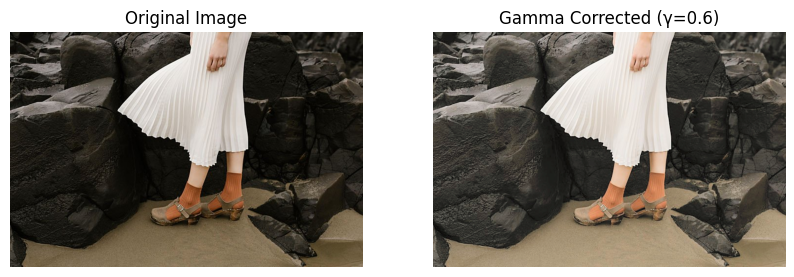

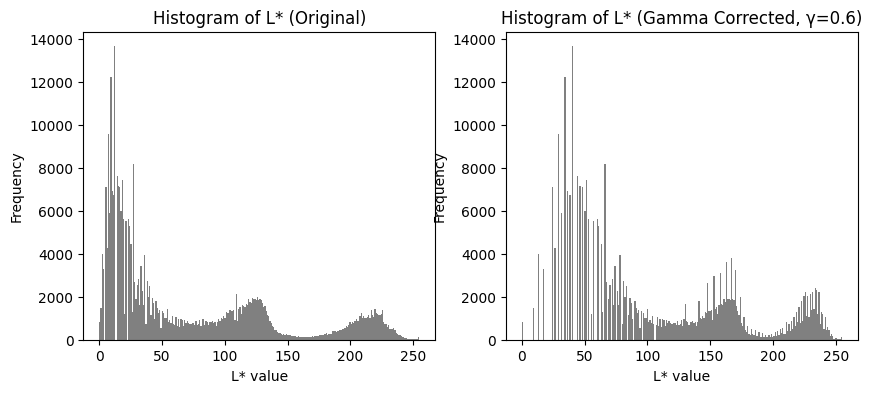

In [5]:

# Load the image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\highlights_and_shadows.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB for display

# Convert RGB → Lab
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
L, a, b = cv2.split(lab)

# Normalize L (0–100 range for Lab, OpenCV stores L in 0–255)
L_norm = L / 255.0

# Apply gamma correction
gamma = 0.6   # <--- state your gamma value
L_corr = np.clip((L_norm ** gamma) * 255.0, 0, 255).astype(np.uint8)

# Merge back corrected L with a and b
lab_corr = cv2.merge([L_corr, a, b])

# Convert back to RGB
img_corr = cv2.cvtColor(lab_corr, cv2.COLOR_LAB2RGB)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_corr)
plt.title(f"Gamma Corrected (γ={gamma})")
plt.axis("off")

plt.show()

# ---------- Histograms of L ----------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(L.flatten(), bins=256, range=(0,255), color='gray')
plt.title("Histogram of L* (Original)")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(L_corr.flatten(), bins=256, range=(0,255), color='gray')
plt.title(f"Histogram of L* (Gamma Corrected, γ={gamma})")
plt.xlabel("L* value")
plt.ylabel("Frequency")

plt.show()


Q4

Chosen value of a: 0.7


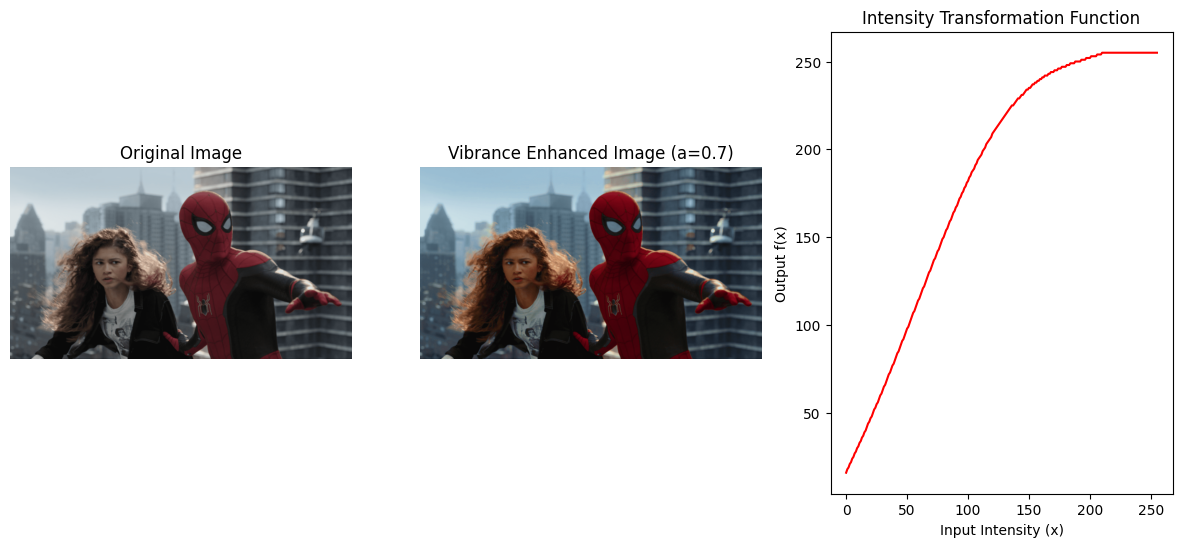

In [6]:

# Load the image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\spider.png")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# (a) Convert to HSV and split planes
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# (b) Apply intensity transformation to saturation plane
sigma = 70
a = 0.7   # <--- adjust this value to get visually pleasing output
x = np.arange(0, 256)

# Transformation function f(x)
f = lambda x: np.minimum(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

# Create lookup table
lookup = np.array([f(val) for val in range(256)]).astype(np.uint8)

# Apply lookup table to saturation plane
s_transformed = cv2.LUT(s, lookup)

# (c) Report chosen value of a
print("Chosen value of a:", a)

# (d) Recombine planes
hsv_enhanced = cv2.merge([h, s_transformed, v])
img_enhanced = cv2.cvtColor(hsv_enhanced, cv2.COLOR_HSV2RGB)

# ---------- (e) Display ----------
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img_enhanced)
plt.title(f"Vibrance Enhanced Image (a={a})")
plt.axis("off")

plt.subplot(1,3,3)
plt.plot(x, lookup, color='red')
plt.title("Intensity Transformation Function")
plt.xlabel("Input Intensity (x)")
plt.ylabel("Output f(x)")

plt.show()


Q6

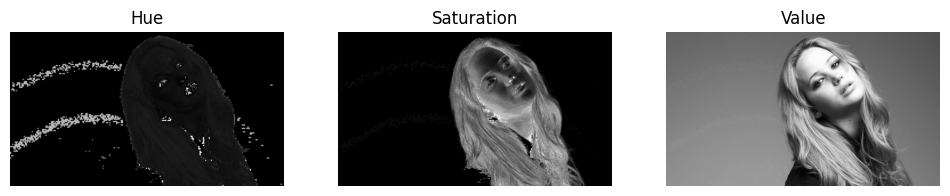

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\jeniffer.jpg")
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # For correct display with matplotlib


## Part a
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# Display Hue, Saturation, Value separately
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='gray')
plt.title("Hue")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray')
plt.title("Saturation")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray')
plt.title("Value")
plt.axis("off")

plt.show()





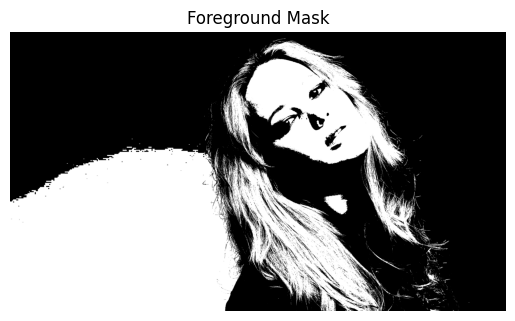

In [4]:
# Threshold the Value plane (can also try Saturation)
_, mask = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.title("Foreground Mask")
plt.axis("off")
plt.show()


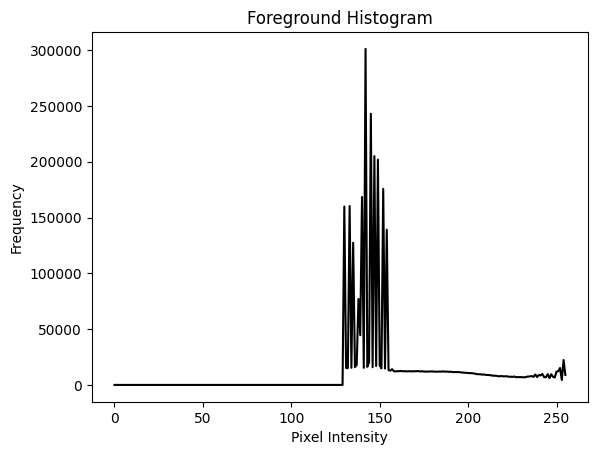

In [5]:
foreground = cv2.bitwise_and(v, v, mask=mask)

# Compute histogram of foreground only
hist = cv2.calcHist([foreground], [0], mask, [256], [0,256])

plt.plot(hist, color='black')
plt.title("Foreground Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


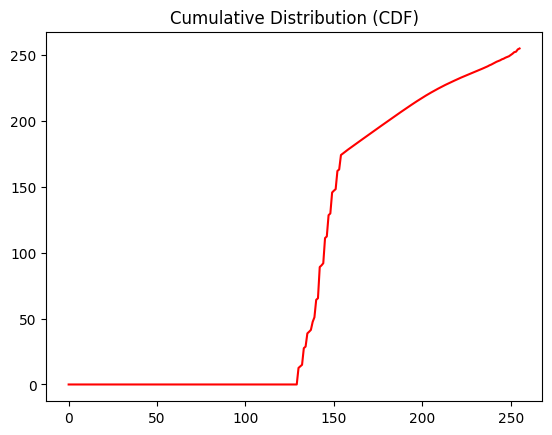

In [8]:
cdf = np.cumsum(hist)
cdf_normalized = cdf * (255 / cdf[-1])   # Normalize to [0,255]

plt.plot(cdf_normalized, color='red')
plt.title("Cumulative Distribution (CDF)")
plt.show()


Formulae for histogram equilization

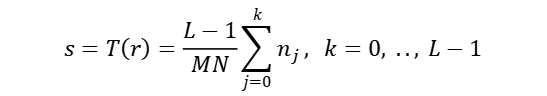

In [9]:
# (e) Apply histogram equalization formula
L = 256
M, N = foreground.shape
cdf_normalized = np.floor(((L-1) / (M*N)) * cdf).astype(np.uint8)

# Create lookup table
lookup = cdf_normalized

# Apply mapping only to foreground
equalized_foreground = lookup[foreground]

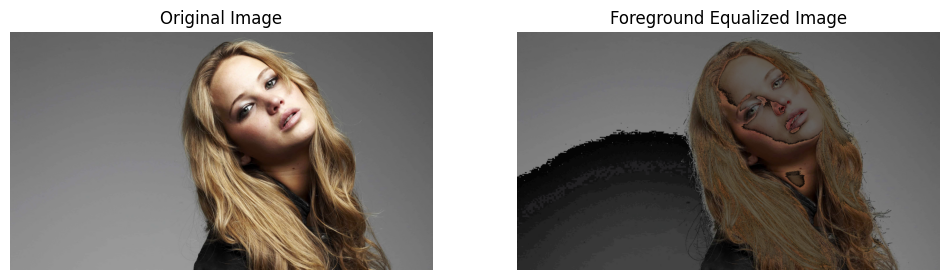

In [10]:
# (f) Combine with background
background = cv2.bitwise_and(v, v, mask=cv2.bitwise_not(mask))
v_equalized = cv2.add(background, equalized_foreground)

# Merge back to HSV → RGB
hsv_equalized = cv2.merge([h, s, v_equalized])
result = cv2.cvtColor(hsv_equalized, cv2.COLOR_HSV2RGB)

# -------- Display --------
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Foreground Equalized Image")
plt.axis("off")

plt.show()

Q7

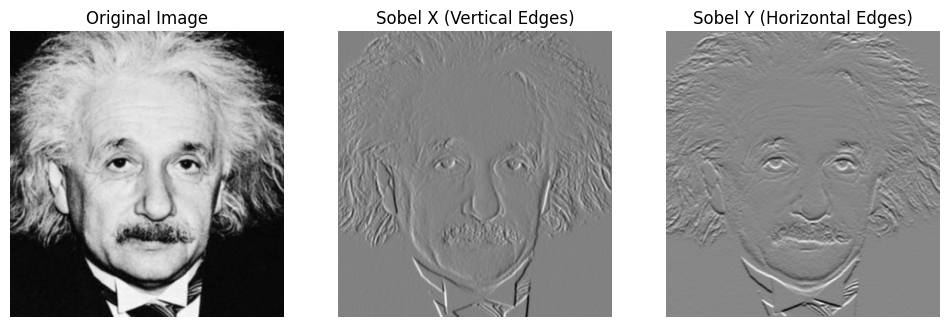

In [12]:

# Load image in grayscale
img = cv2.imread(r"E:\MSc-AI\Recordings\Semester 3\IT5437 - CV\Assignment_1\a1images\einstein.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Please check the path and filename.")

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [0,  0,  0],
                    [1,  2,  1]], dtype=np.float32)

# Apply filter2D with Sobel kernels
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)


# ---------- Display ----------
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_x, cmap='gray')
plt.title("Sobel X (Vertical Edges)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(grad_y, cmap='gray')
plt.title("Sobel Y (Horizontal Edges)")
plt.axis("off")



plt.show()


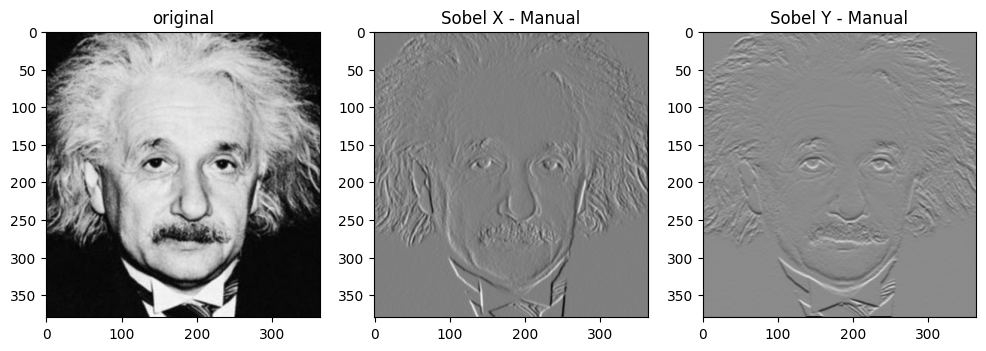

In [15]:

def convolve(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # pad image with zeros
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# Apply manual convolution
grad_x = convolve(img, sobel_x)
grad_y = convolve(img, sobel_y)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("original")
plt.subplot(1,3,2), plt.imshow(grad_x, cmap="gray"), plt.title("Sobel X - Manual")
plt.subplot(1,3,3), plt.imshow(grad_y, cmap="gray"), plt.title("Sobel Y - Manual")

plt.show()


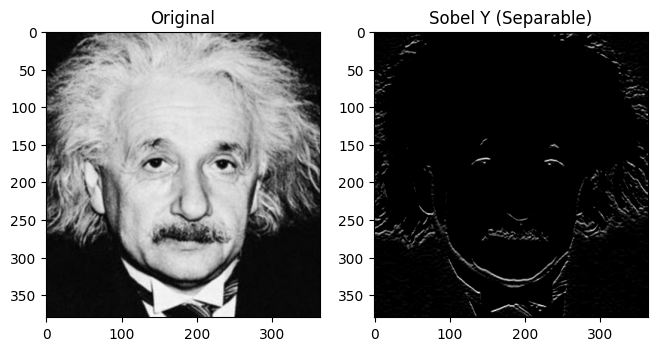

In [18]:


kx_y = np.array([[1, 2, 1]], dtype=np.float32)   # horizontal
ky_y = np.array([[1], [0], [-1]], dtype=np.float32) # vertical

# Apply separable convolution for Y
intermediate_y = cv2.filter2D(img, -1, kx_y)
sobel_y = cv2.filter2D(intermediate_y, -1, ky_y)


# Show results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(1,3,2), plt.imshow(sobel_y, cmap="gray"), plt.title("Sobel Y (Separable)")
plt.show()
